In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from figure.Geom_figures import Ellipse, Triangle, Rectangle, Flower
from PDE.Conductivity_R2.Conductivity import Conductivity
from cfg import mconfig
from dict.CGPT.Invariant_descriptors import Compute_Invariants, ShapeRecognition_CGPT_frequency, ShapeRecognition_CGPT_majority_voting_frequency, ShapeRecognition_PT_freq
from figure.ImageShape.Image_shape import ImgShape

In [3]:
#Set up the number of points
N = 2**9
#Set up typical size
delta = 0.3

In [4]:
#Create different inclusions
B1 = Ellipse(1, 1/2, phi=0.0, NbPts=N)
B2 = Triangle(1, np.pi/3, npts= N)
B3 = Rectangle(1, 1/2, N)
B4 = Flower(1, 1, N, 5,0.3, tau=0.5) 
B5 = Ellipse(1, 1/4, phi=0.0, NbPts=N)
print(os.getcwd())
B6 = ImgShape('../../Test_images/A.png', N)
B7 = ImgShape('../../Test_images/F.png', N)

/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/demo/Electric_Fish
Successful extraction!
Successful extraction!


In [5]:
#Define a dictionary of shapes
D = [B1*delta, B2*delta, B3*delta, B4*delta, B5*delta, B6*delta, B7*delta]


In [6]:
#Set conductivity and permitivitty for inclusions
cnd = 10*np.array([1,1,1,1,0.5,1,1])
pmtt = 5*np.array([1,1,1,1,0.5,1,1])

#Set up a list of working frequencies
freq = np.linspace(0, 2*np.pi, endpoint=False, num=10)

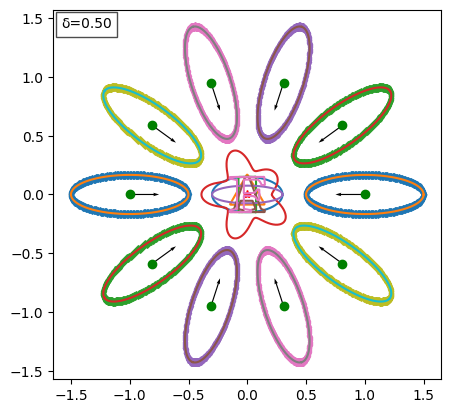

In [7]:
#Set up the fish body
Omega = Ellipse(1, 1/3, phi=0.0, NbPts=N) * 0.5

#Set up specific parameters for acquisition method
idxRcv = np.arange(0, Omega.nb_points-1,2)
Ns = 10
impd = 1
#Set up the fish acquisition system
cfg = mconfig.Fish_circle(Omega, idxRcv, np.zeros((2,1)), 1, Ns, 2*np.pi, impd=impd)
#Plot the configuration with the shapes
ax = plt.subplot()
cfg.plot(ax=ax)

for shape in D:
    shape.plot(ax=ax)

plt.show()


In [8]:
#Compute Invariants for the dictionary shapes

tau, mu = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=1) #type : ignore

I1, I2 = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=2) 

Ratio computed!
Ratio computed!
Ratio computed!
Ratio computed!
Ratio computed!
Ratio computed!
Ratio computed!
 Invariants computed! 
 Invariants computed! 
 Invariants computed! 
 Invariants computed! 
 Invariants computed! 
 Invariants computed! 
 Invariants computed! 


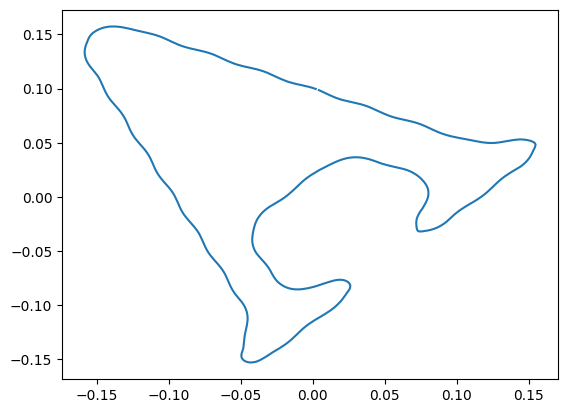

In [9]:
#Define a true index for the shape:
true_index = 5
#Generate a new shape to recognize
Bnew = (D[true_index]) < np.pi /4

#Set up parameters to perturb the shape
epsilon = -0.005
p = 32
n = 20

#Perturb the chosen shape
Bnew = Bnew.global_perturbation(epsilon, p, n)

#Plot the chose shape
axx = plt.subplot()
Bnew.plot(ax=axx)
plt.show()

In [10]:
#Define new conductivity and permitivitty values
cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])

#Compute the invariants of the new shape
tau_new, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=0.0)

I1_new, I2_new =  Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=0.0)

Ratio computed!
 Invariants computed! 


In [11]:
# Recognize the shape using different algorithms
index_higher_order, error = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
index_maj, votes = ShapeRecognition_CGPT_majority_voting_frequency(I1, I2, I1_new, I2_new)
index = ShapeRecognition_PT_freq(mu, mu_new)

print( "Recognized shape index PT:", index)
print( "Recognized shape index high order:", index_higher_order)
print("Recognized shape majority voting", index_maj)
print("Votes per shape were:", votes)
print("True index:", true_index)

[5.28277667 1.93060247 3.13116359 3.29663323 4.935436   6.9770672
 2.29538796]
Recognized shape index PT: 1
Recognized shape index high order: 2
Recognized shape majority voting 2
Votes per shape were: [ 0.  0. 10.  0.  0.  0.  0.]
True index: 5
